<a href="https://colab.research.google.com/github/ElMango29/Personal_Project_Code_29021728/blob/main/Personal_Project_Code_29021728.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Technical indicators

!pip install pandas_ta
import pandas_ta as pta

## !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

## !tar -xzf ta-lib-0.4.0-src.tar.gz
## %cd ta-lib/
## !./configure --prefix=$HOME
## !make
## !make install

## !TA_LIBRARY_PATH=~/lib TA_INCLUDE_PATH=~/include pip install ta-lib
#import talib


plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 14.7 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=39cf94731c53c9c6e320c773a72510aadf38894d7c82698847b79d64c31a410a
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from keras import optimizers
from keras.callbacks import History
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, TimeDistributed

import tensorflow as tf

In [7]:
!pip install ray filelock
from ray import tune
from ray.tune.search.hyperopt import HyperOptSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Upload the data file
from google.colab import files
files.upload()

Saving GBPUSD1440.csv to GBPUSD1440.csv


{'GBPUSD1440.csv': b'"2007-01-01 00:00\t1.95805\t1.96417\t1.95765\t1.96332\t146179"\r\n"2007-01-02 00:00\t1.96330\t1.97418\t1.96040\t1.97295\t157568"\r\n"2007-01-03 00:00\t1.97301\t1.97490\t1.94814\t1.95169\t147924"\r\n"2007-01-04 00:00\t1.95165\t1.95296\t1.93980\t1.94258\t148462"\r\n"2007-01-05 00:00\t1.94251\t1.94316\t1.92633\t1.92900\t142467"\r\n"2007-01-07 00:00\t1.93033\t1.93057\t1.92907\t1.92932\t6268"\r\n"2007-01-08 00:00\t1.92938\t1.94023\t1.92608\t1.93987\t148026"\r\n"2007-01-09 00:00\t1.93985\t1.94527\t1.93852\t1.93880\t147058"\r\n"2007-01-10 00:00\t1.93881\t1.94205\t1.93148\t1.93187\t149139"\r\n"2007-01-11 00:00\t1.93200\t1.95336\t1.93169\t1.94395\t151003"\r\n"2007-01-12 00:00\t1.94392\t1.96036\t1.94268\t1.95893\t141242"\r\n"2007-01-14 00:00\t1.95938\t1.96019\t1.95791\t1.95992\t7064"\r\n"2007-01-15 00:00\t1.95980\t1.96676\t1.95697\t1.96399\t149865"\r\n"2007-01-16 00:00\t1.96413\t1.97020\t1.95900\t1.96069\t149076"\r\n"2007-01-17 00:00\t1.96068\t1.97220\t1.96035\t1.97015\t1466

In [8]:
# Read the data file (df)
df = pd.read_csv('GBPUSD1440.csv', 
                 names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"], 
                 sep=' |\t', 
                 engine='python')

# View the data
df

,Date,Time,Open,High,Low,Close,Volume
0,"""2007-01-01",00:00,1.95805,1.96417,1.95765,1.96332,"146179"""
1,"""2007-01-02",00:00,1.96330,1.97418,1.96040,1.97295,"157568"""
2,"""2007-01-03",00:00,1.97301,1.97490,1.94814,1.95169,"147924"""
3,"""2007-01-04",00:00,1.95165,1.95296,1.93980,1.94258,"148462"""
4,"""2007-01-05",00:00,1.94251,1.94316,1.92633,1.92900,"142467"""
...,...,...,...,...,...,...,...
4916,"""2022-09-19",00:00,1.14336,1.14451,1.13549,1.14442,"90126"""
4917,"""2022-09-20",00:00,1.14443,1.14605,1.13570,1.13801,"151416"""
4918,"""2022-09-21",00:00,1.13802,1.13842,1.12350,1.12565,"194063"""
4919,"""2022-09-22",00:00,1.12566,1.13638,1.12113,1.12621,"225720"""


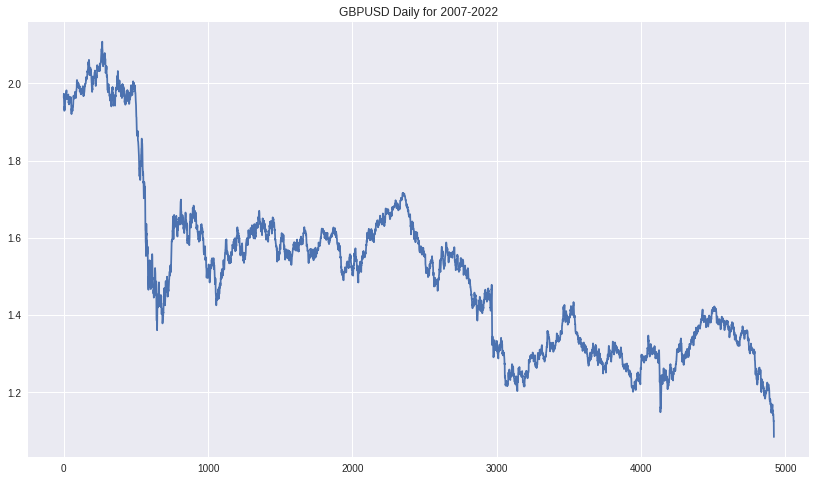

In [9]:
# Plot the data for Adj Close
df["Close"].plot(title="GBPUSD Daily for 2007-2022");

In [10]:
# Adding indicators via adding columns to the data (df) table
df['RSI'] = pta.rsi(df.Close, length=15)
df['EMAF'] = pta.rsi(df.Close, length=20)
df['EMAM'] = pta.rsi(df.Close, length=100)
df['EMAS'] = pta.rsi(df.Close, length=150)

# The target, aka expected output.
# Can be calculated in 3 ways.
# First: Difference in current open and future close price.
#df['Target'] = df['Close'] - df.Open
#df['Target'] = df['Target'].shift(-1)


# 2: Calculating whether the price went up or down between closing days.
# Could be used later on for the trading simulation part.
#df['TargetClass'] = [1 if df.Target[i]>0 else 0 for i in range(len(df))]

# 3: The target is the closing price of the next day.
df['TargetNextClose'] = df['Close'].shift(-1)
# To be checked but shift ^ makes it that the current row has the necessary
# output of the next day's close for the machine learning algorithm to be able
# to use it as the aim.

# Drop empty values/rows. Drops first 150 values due to technical indicators being NaN due to their settings.
df.dropna(inplace=True)
# Reset the index
df.reset_index(inplace=True)
# Drop the volume, date, time, and index as they aren't needed. index specifically
# as resetting the index sets the old index as a new column, which messes up the later scaling.
df.drop(['Volume', 'Date', 'Time', 'index'], axis=1, inplace=True)

df

,Open,High,Low,Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,1.99930,2.00060,1.99560,1.99800,63.139979,60.061141,53.786997,53.325098,1.99820
1,1.99800,2.00160,1.99580,1.99820,63.283155,60.172469,53.813896,53.346732,1.99955
2,1.99820,2.00030,1.99290,1.99955,64.286418,60.945960,53.996470,53.493216,2.00200
3,1.99955,2.00425,1.99745,2.00200,66.088174,62.343054,54.327432,53.758480,2.00847
4,2.00200,2.00870,2.00100,2.00847,70.324268,65.749069,55.187417,54.449197,2.00785
...,...,...,...,...,...,...,...,...,...
4765,1.14137,1.14406,1.14108,1.14336,35.494819,35.996511,40.027022,41.393691,1.14442
4766,1.14336,1.14451,1.13549,1.14442,36.379288,36.656542,40.157535,41.481555,1.13801
4767,1.14443,1.14605,1.13570,1.13801,33.411083,34.398517,39.630734,41.106383,1.12565
4768,1.13802,1.13842,1.12350,1.12565,28.591587,30.575646,38.643365,40.397147,1.12621


In [11]:
# Viewing the values
df_set = df.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

df_set.head(5)

,Open,High,Low,Close,RSI,EMAF,EMAM,EMAS,TargetNextClose
0,1.99930,2.00060,1.99560,1.99800,63.139979,60.061141,53.786997,53.325098,1.99820
1,1.99800,2.00160,1.99580,1.99820,63.283155,60.172469,53.813896,53.346732,1.99955
2,1.99820,2.00030,1.99290,1.99955,64.286418,60.945960,53.996470,53.493216,2.00200
3,1.99955,2.00425,1.99745,2.00200,66.088174,62.343054,54.327432,53.758480,2.00847
4,2.00200,2.00870,2.00100,2.00847,70.324268,65.749069,55.187417,54.449197,2.00785


In [ ]:
# Apply a scalar to the data for the Neural Network. Helps with prediction and avoiding anomalies.
# Creates a numpy array.
sc = MinMaxScaler(feature_range=(0,1))
df_set_scaled = sc.fit_transform(df_set)
print(df_set_scaled)

[[0.88957224 0.88206416 0.89499217 ... 0.7408683  0.74402762 0.89291405]
 [0.88824853 0.88308481 0.89519686 ... 0.741847   0.74497805 0.89423368]
 [0.88845218 0.88175796 0.89222881 ... 0.74848975 0.75141328 0.89662858]
 ...
 [0.0191123  0.00986966 0.01491193 ... 0.22580739 0.20724365 0.03998983]
 [0.0125854  0.00208212 0.00242562 ... 0.18988301 0.17608599 0.04053724]
 [0.         0.         0.         ... 0.19242549 0.17814498 0.        ]]


In [ ]:
# Setup the input for the model.

# X is the input data array for the model
X = []

# Steps is the number of time-steps you want to look back. In this case, steps is in days.
steps = 30

print(df_set_scaled.shape[0])

# Process the 8 columns wanted as input (from Open to the last indicator)
for i in range(8):
  X.append([])
  for j in range(steps, df_set_scaled.shape[0]):
    X[i].append(df_set_scaled[j-steps:j, i])

# Puts the input data in the right format by reshaping. TODO: check how this works.
X=np.moveaxis(X,[0],[2])

# Target data is y. sets y input (yi) as the last column in the table, hence the -1.
X, yi = np.array(X), np.array(df_set_scaled[steps:, -1])
# Reshape the y target input for the model.
y=np.reshape(yi,(len(yi),1))

# Prints the shape of the X and y input data. Make sure it is correct for the model.
print("X shape: ", X.shape)
print(X)
print("\ny shape: ", y.shape)
print(y)


# SUMMARISATION CODE: The whole X part of the cell can be summarised in the next line of code:
#X = np.array([df_set_scaled[i-steps:i,:4].copy() for i in range(steps,len(df_set_scaled))])

4770
X shape:  (4740, 30, 8)
[[[0.88957224 0.88206416 0.89499217 ... 0.70015298 0.7408683  0.74402762]
  [0.88824853 0.88308481 0.89519686 ... 0.70181428 0.741847   0.74497805]
  [0.88845218 0.88175796 0.89222881 ... 0.7133568  0.74848975 0.75141328]
  ...
  [0.94506613 0.93881217 0.94294165 ... 0.80001952 0.92787188 0.93399694]
  [0.94028042 0.9317697  0.92242112 ... 0.55460704 0.78582789 0.80179551]
  [0.91380627 0.90594731 0.91812255 ... 0.53349971 0.77099344 0.78780595]]

 [[0.88824853 0.88308481 0.89519686 ... 0.70181428 0.741847   0.74497805]
  [0.88845218 0.88175796 0.89222881 ... 0.7133568  0.74848975 0.75141328]
  [0.8898268  0.88578952 0.89688559 ... 0.73420511 0.76053149 0.76306664]
  ...
  [0.94028042 0.9317697  0.92242112 ... 0.55460704 0.78582789 0.80179551]
  [0.91380627 0.90594731 0.91812255 ... 0.53349971 0.77099344 0.78780595]
  [0.91187162 0.91334701 0.92057887 ... 0.60342479 0.81209937 0.82717446]]

 [[0.88845218 0.88175796 0.89222881 ... 0.7133568  0.74848975 0.751

In [ ]:
# Split the data into training and testing data sets.
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]

# Printing them all to check
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

3792
(3792, 30, 8)
(948, 30, 8)
(3792, 1)
(948, 1)


In [ ]:
# Training the LSTM model

# Input variable uses the input function, with shape as no. of time-steps and columns as params.
# 2D input shape matrix that has to be fed into the model (in training and testing/prediction).
lstm_input = Input(shape=(steps, 8), name='lstm_input')

# Intermediate (hidden) layer of nodes with 150 nodes. 
inputs = LSTM(150, name='first_layer')(lstm_input)
# One Dense layer with a singular node.
inputs = Dense(1, name='dense_layer')(inputs)
# Output of the results
output = Activation('linear', name='output')(inputs)
# The model declaration with all the layers included.
model = Model(inputs=lstm_input, outputs=output)

# Adam optimizer for optimization. TODO: Research into this
adam = tf.keras.optimizers.Adam()

# Compile the whole model. TODO: check the different parts, including differnt loss optimizations
# and types.
model.compile(optimizer=adam, loss='mse')

# Fit the model by feeding it the input training data and target (expected output) training data, 
# batch_size (size of the model, relatively small in this case), 
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split=0.1)
#TODO: check all of these different parameters and how to optimize them.

Epoch 1/30
228/228 [==============================] - 10s 35ms/step - loss: 0.0044 - val_loss: 1.2862e-04
Epoch 2/30
228/228 [==============================] - 8s 33ms/step - loss: 2.5199e-04 - val_loss: 1.2198e-04
Epoch 3/30
228/228 [==============================] - 9s 38ms/step - loss: 2.3250e-04 - val_loss: 9.6245e-05
Epoch 4/30
228/228 [==============================] - 7s 32ms/step - loss: 2.4597e-04 - val_loss: 8.3173e-05
Epoch 5/30
228/228 [==============================] - 7s 32ms/step - loss: 2.2905e-04 - val_loss: 7.8096e-05
Epoch 6/30
228/228 [==============================] - 7s 33ms/step - loss: 2.4521e-04 - val_loss: 9.4611e-05
Epoch 7/30
228/228 [==============================] - 9s 38ms/step - loss: 2.2839e-04 - val_loss: 9.8314e-05
Epoch 8/30
228/228 [==============================] - 7s 32ms/step - loss: 2.4643e-04 - val_loss: 3.5080e-04
Epoch 9/30
228/228 [==============================] - 7s 33ms/step - loss: 2.2708e-04 - val_loss: 8.2977e-05
Epoch 10/30
228/228 [=

In [ ]:
# Prediction

y_pred = model.predict(X_test)

# Printing the first 10 predicted vs actual data values.
for i in range(10):
  print(y_pred[i], y_test[i])

[0.14882924] [0.16128875]
[0.14807096] [0.16112257]
[0.16531008] [0.15420182]
[0.16610005] [0.16164065]
[0.15622424] [0.15847352]
[0.16364695] [0.16374229]
[0.1612765] [0.1591089]
[0.16685745] [0.15855172]
[0.16235347] [0.15496427]
[0.16202542] [0.16005709]


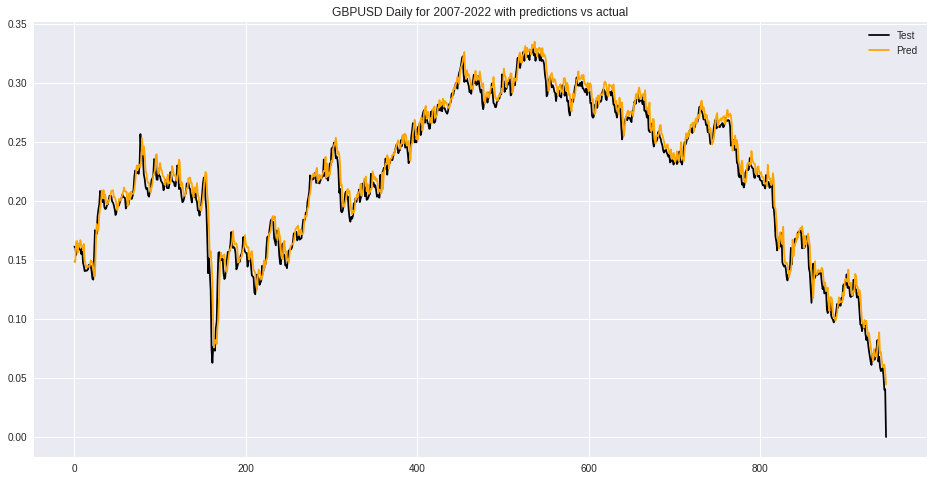

In [ ]:
# Plotting the predicted versus actual data values.
plt.figure(figsize=(16,8))
plt.plot( y_test, color = 'black', label = 'Test' )
plt.plot( y_pred, color = 'orange', label= 'Pred' )
plt.legend()
plt.title("GBPUSD Daily for 2007-2022 with predictions vs actual")
plt.show()